In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://drive.google.com/uc?export=download&id=17KkwezffNIJK6p6NuE-n0_BMMaItjSuS'
data = pd.read_csv(url)

Обзор и обработка данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

In [ ]:
data.describe()

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


In [ ]:
data.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


In [ ]:
# Проверка пропущенных значений
print(data.isnull().sum())

Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_Style                   0
Online_Courses_Completed                   0
Participation_in_Discussions               0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Use_of_Educational_Tech                    0
Self_Reported_Stress_Level                 0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
Final_Grade                                0
dtype: int64


В данном наборе данных пропущенных значений не обнаружено. Следовательно, обработка не требуется

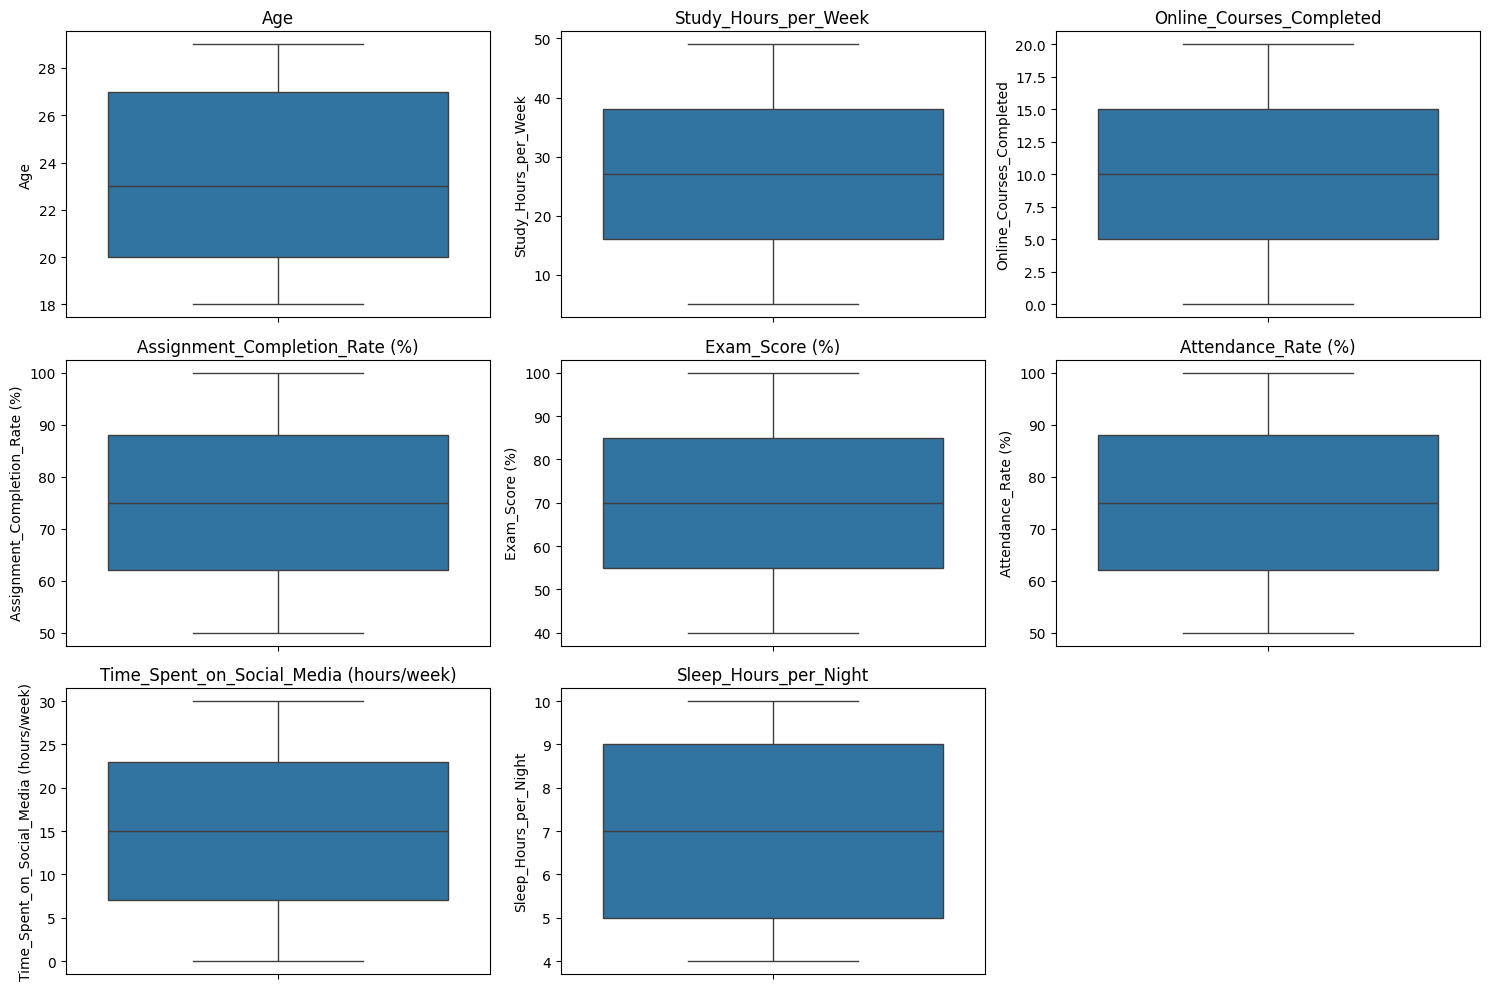

In [ ]:
# Анализ выбросов для числовых признаков
numeric_cols = ['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed',
                'Assignment_Completion_Rate (%)', 'Exam_Score (%)',
                'Attendance_Rate (%)', 'Time_Spent_on_Social_Media (hours/week)',
                'Sleep_Hours_per_Night']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Функция для выявления выбросов
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers
outliers = data[numeric_cols].apply(find_outliers)

print("Выбросы:")
print(outliers)

Выбросы:
        Age  Study_Hours_per_Week  Online_Courses_Completed  \
0     False                 False                     False   
1     False                 False                     False   
2     False                 False                     False   
3     False                 False                     False   
4     False                 False                     False   
...     ...                   ...                       ...   
9995  False                 False                     False   
9996  False                 False                     False   
9997  False                 False                     False   
9998  False                 False                     False   
9999  False                 False                     False   

      Assignment_Completion_Rate (%)  Exam_Score (%)  Attendance_Rate (%)  \
0                              False           False                False   
1                              False           False                False   
2  

Данные относительно чистые. Серьезные выбросы отсутствуют.

Распределение классов в 'Preferred_Learning_Style':
Preferred_Learning_Style
3    2523
1    2513
2    2498
0    2466
Name: count, dtype: int64


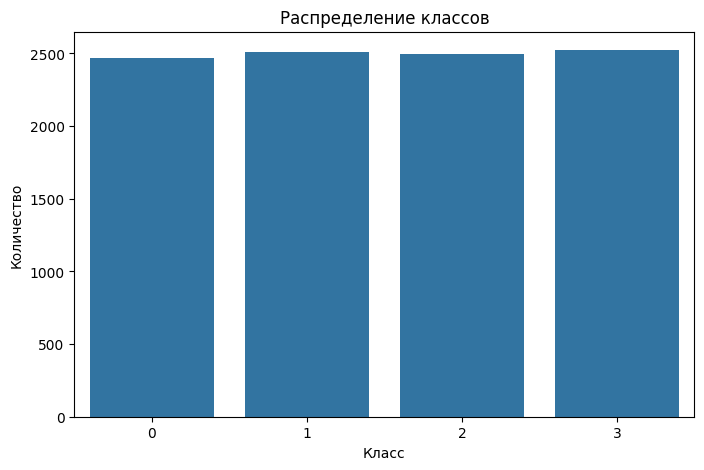

In [ ]:
# Проверка баланса классов целевой переменной
print("Распределение классов в 'Preferred_Learning_Style':")
class_counts = data['Preferred_Learning_Style'].value_counts()
print(class_counts)

plt.figure(figsize=(8,5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Кодирование признаков
categorical_features = [
    "Gender",
    "Participation_in_Discussions",
    "Use_of_Educational_Tech",
    "Self_Reported_Stress_Level",
    "Final_Grade"
]

df_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Кодирование целевую переменную
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Preferred_Learning_Style_encoded'] = label_encoder.fit_transform(data['Preferred_Learning_Style'])
print(df_model_encoded.head())

  Student_ID  Age  Study_Hours_per_Week  Online_Courses_Completed  \
0     S00001   18                    48                        14   
1     S00002   29                    30                        20   
2     S00003   20                    47                        11   
3     S00004   23                    13                         0   
4     S00005   19                    24                        19   

   Assignment_Completion_Rate (%)  Exam_Score (%)  Attendance_Rate (%)  \
0                             100              69                   66   
1                              71              40                   57   
2                              60              43                   79   
3                              63              70                   60   
4                              59              63                   93   

   Time_Spent_on_Social_Media (hours/week)  Sleep_Hours_per_Night  \
0                                        9                      8   
1 

In [40]:
# Разделение признаков
X = data.drop(['Student_ID', 'Final_Grade', 'Preferred_Learning_Style','Self_Reported_Stress_Level'], axis=1)
y = data['Preferred_Learning_Style']

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Масштабирование (обязательно для KNN, LogisticRegression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Метод PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

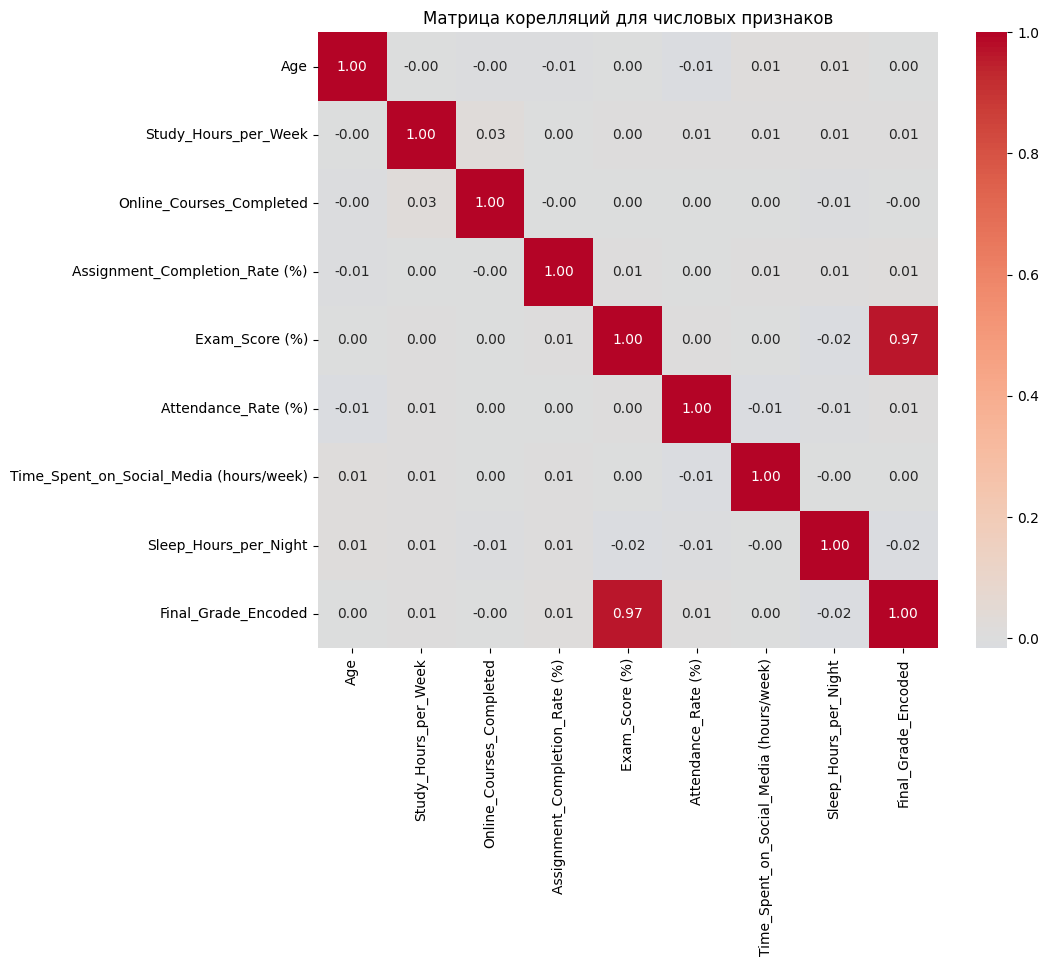

In [42]:
# Анализ корреляций
num_cols = ['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed',
            'Assignment_Completion_Rate (%)', 'Exam_Score (%)',
            'Attendance_Rate (%)', 'Time_Spent_on_Social_Media (hours/week)',
            'Sleep_Hours_per_Night', 'Final_Grade_Encoded']

plt.figure(figsize=(10, 8))
corr_matrix = X[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("Матрица корелляций для числовых признаков")
plt.show()

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# Разделение данных (20% тестовая выборка)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           1       1.00      1.00      1.00       503
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       504

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



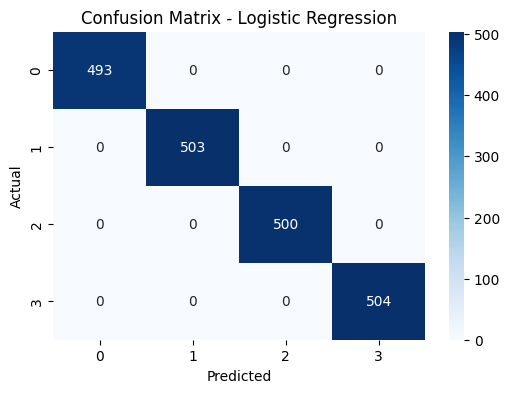


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.34      0.30       493
           1       0.25      0.31      0.28       503
           2       0.22      0.21      0.21       500
           3       0.28      0.16      0.21       504

    accuracy                           0.25      2000
   macro avg       0.26      0.25      0.25      2000
weighted avg       0.26      0.25      0.25      2000



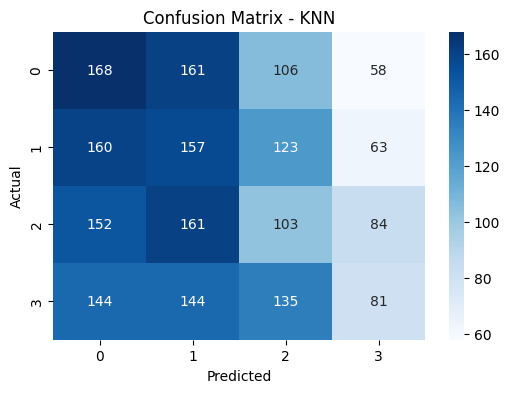


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           1       1.00      1.00      1.00       503
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       504

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



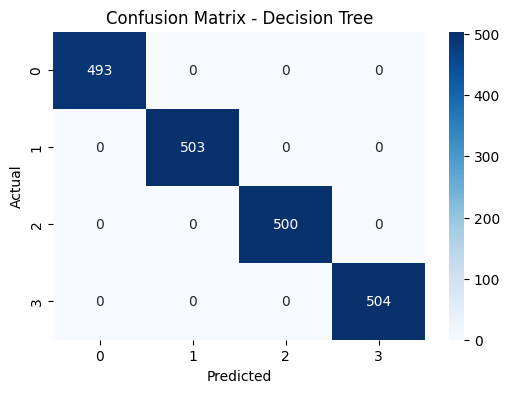


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           1       1.00      1.00      1.00       503
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       504

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



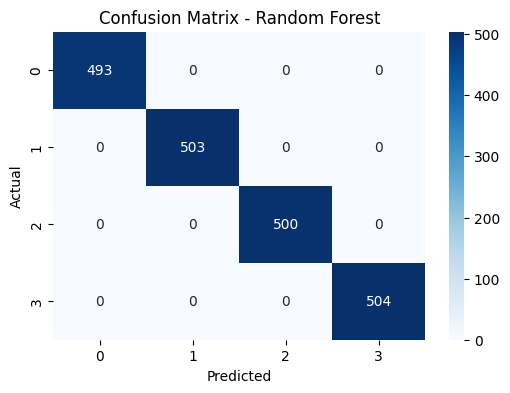


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           1       1.00      1.00      1.00       503
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       504

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



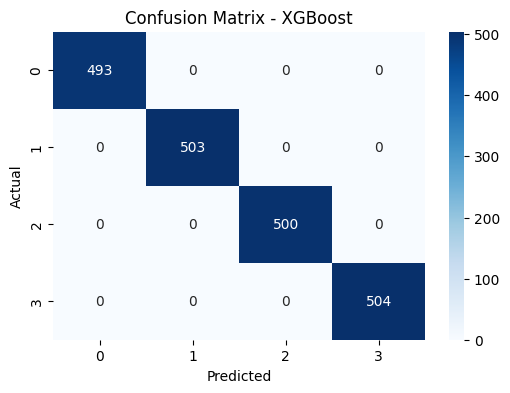

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
# Построение и оценка моделей
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier()
}

results = []
for name, model in models.items():
    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказания
    y_pred = model.predict(X_test)

    # Оценка модели
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_pca, y, cv=5)

    # Сохранение результатов
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'CV Mean Accuracy': cv_scores.mean(),
        'CV Std': cv_scores.std()
    })

    # Вывод отчета по классификации
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [45]:
# Сравнение моделей
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("\nСравнение моделей:")
print(results_df)


Сравнение моделей:
                 Model  Accuracy  CV Mean Accuracy    CV Std
0  Logistic Regression    1.0000            1.0000  0.000000
2        Decision Tree    1.0000            0.5413  0.014692
3        Random Forest    1.0000            0.8570  0.004278
4              XGBoost    1.0000            0.9433  0.004179
1                  KNN    0.2545            0.6858  0.007118


**Выводы:**
- **Logistic Regression** показывает 100% точности на тесте и на кросс-валидации (CV Mean Accuracy = 1.0, CV Std = 0.0). С точки зрения классификации — модель абсолютно точно предсказывает все классы
- **XGBoost** также очень хорошо себя показывает — CV Mean Accuracy = 0.9433
- **Decision Tree** имеет существенно меньшую CV Accuracy (~0.54), что может говорить о переобученности
- **KNN** имеет точность значительно ниже остальных, данная модель неуместна для конкретной задачи